This code aims to computationally study the statistics of risk in order to develop better strategies and beat the brothers at the game. Before beginning a computational study, it is advantegeous to develop the mathematical theory. 

In a classical risk offensive, an attacking army attempts to annhilate a defending army through a series of dice rolls which affect updates to the number of live armsmen on the attacking and defending sides. Thus any risk battle can be represented as a set ordered by the integers of the number of armsmen belonging to each side at each discrete iteration step. Define $H = \{ (M_{A,i}, M_{D,i}): i \in [1,T] \}$ where $i$ is an integer, $H$ is a battle history, $M_{A,i}, M{D,i}$ are the number of armsmen belonging to the attacker and defender respectively at each discrete step in the battle. 

To develop a theory of strategy we must first investigate the probabalistic dynamics of a battle. Specifically, we will begin by studying the distribution over outcomes when an attacker and defender both use only a single die. 

Let $d_A$ and $d_D$ be realizations of the attacking and defending dice, whose distributions are uniform over the integers $1$ through $6$. $\mathcal{P}(d_A) = \mathcal{P}(d_D) = \frac{1}{6}$. The defender is said to win if $d>=a$. This amounts to $$\frac{1}{2}\sum\limits_{n=1}^6 n = \frac{6^2 + 6}{2} = 21$$ outcomes of a total of $6^2$ outcomes. Thus the probability of the defender winning $p_D = \mathcal{P}(d \ge a) = \frac{21}{36} \approx .58$. Then $p_A = 1-p_d = .42$

It should seem that defender has the probabalistic advantage. However, the probabalistic dynamics become far more interesting when a multiplicity of dice are used by the attacker and defender. In fact, the dice configuration has far more impact on the resulting probabality distributions than does the decision rule for the outcome of a single dice comparison. Suppose $n_A = 3$ dice are used by the attacker and $n_D = 2$ dice are used by the defender. We are interested in deriving distribution over the number of losses for the attacker and the defender. Note that the total number of outcomes in this situation $$T(n_A, n_D) = (6^{n_A})\times(6^{n_D}) = 7776$$. 

Now, let the losses for attacker $A$ and defender $D$ be denoted by $l_A, l_D$ respectively. There is a bijection between loses for $A$ and for $D$, so it is only necessary to consider one side, either that of the attacker or of the defender. 

1. $\mathcal{P}(l_A = 1) = \mathcal{P}(l_D = 1)$
2. $\mathcal{P}(l_A = 2) = \mathcal{P}(l_D = 0)$
3. $\mathcal{P}(l_A = 0) = \mathcal{P}(l_D = 2)$

(2) can be restated as asking for the probability all of the attacking dice are larger than all of the defending dice. 

$$\mathcal{P}(\ \min d_A > \max d_D) = \frac{3!2!}{T}\sum\limits^6_{i=1}\sum^i_{j=1}\left(j-1\right)^3 $$




In particular, when a die of an attacker and defender are compared, if the value of the defending die is greater than or equal to the value of the attacking die then the attacker 



In [132]:
def ran(n):
    return range(1,n+1)

def isall(func, arr):
    return sum(map(func, arr)) > 0

def isgreater(val):
    return lambda x: x>val

def isless(val):
    return lambda x: x<val

In [160]:
w = 0
for i in ran(6):
    for j in ran(i):
        w+=(j-1)**3
T = 7776
w/T

0.04771090534979424

## Case 3: Attacker Loses 0, Defender Loses 2

In [133]:
from __future__ import division
n3 = 0
T = 7776
for i in ran(6):
    for j in ran(6):
        for k in ran(6):
            for l in ran(6):
                for w in ran(6):
                    if min([i,j,k]) > max([l,w]): n3+=1
p3 = n3/T
p3

0.06648662551440329

In [134]:
range(6-2)

[0, 1, 2, 3]

## Case 2: Attacker Loses 2, Defender Loses 0

In [135]:
n2=0
T = 7776
for i in ran(6):
    for j in ran(6):
        for k in ran(6):
            for l in ran(6):
                for w in ran(6):
                    if max([i,j,k]) <= min([l,w]): n2+=1
p2 = n2/T
p2

0.15213477366255143

## Case 1: Attacker Loses 1, Defender Loses 1

In [136]:
p1 = 1-p2-p3
p1

0.7813786008230452

## Expected Loss of Attacker

In [137]:
xs = np.array([0,1,2])*(-1)
ps = np.array([p3, p1, p2])
mu = (xs*ps).sum()
mu

-1.0856481481481481

## Expected Loss of Defender

In [138]:
xs = np.array([0,1,2])*(-1)
ps = np.array([p2, p1, p3])
mu = (xs*ps).sum()
mu

-0.91435185185185186


First we'll setup a dice class to abstract the dice rolling

In [5]:
import random
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

class Dice:
    def __init__(self, dicemax, ndice):
        self.dicemax = dicemax
        self.ndice = ndice
        self.initial_ndice = ndice
        self.inital_dicemax = dicemax

    def roll(self):
        dice = []
        for i in range(self.ndice):
            dice.append(random.randint(1,self.dicemax))
        return sorted(dice, reverse=True)

    def reset(self):
        self.ndice = self.initial_ndice
        self.dicemax = self.inital_dicemax

Next, a player class to abstract the logic of the attacker and defender

In [24]:
class Player:
    # Then players can subclass to implement different strategies
    def __init__(self, dice, number_of_people):
        self.dice = dice
        self.npeople = number_of_people
        self.initial_people = number_of_people
        self.history = []

    def roll(self):
        return self.dice.roll()

    def ready(self, opponent):
        return True
    
    def delta(self, dp):
        self.npeople += dp
        self.history.append(self.npeople)
    
    def reset(self):
        self.npeople = self.initial_people
        self.history = []
        self.dice.reset()
    
    @property
    def minmen(self):
        pass

class Attacker(Player):
    def roll(self):
        if self.npeople in [3,2]:
            self.dice.ndice=2
        if self.npeople ==1:
            self.dice.ndice=1
        return Player.roll(self)

    def ready(self, opponent):
        return self.npeople > 1
    
    @property
    def minmen(self):
        return 1

class Defender(Player):
    def ready(self, opponent):
        return self.npeople > 0
    
    @property
    def minmen(self):
        return 0
    
class ClassicBattleContract:
    def __init__(self, a, d):
        self.a = a 
        self.d = d
        
    def compareDice(self, diceA, diceD):
        if diceA > diceD:
            return (0,-1)
        elif diceA <= diceD:
            return (-1,0)
    
    def losses(self, rolla, rolld):
        minind = min(len(rolla), len(rolld))
        aligneda = rolla[:minind]
        alignedd = rolld[:minind]
        contract = map(
            lambda x: self.compareDice(*x),
            zip(aligneda, alignedd))
        lossA = 0
        lossD = 0
        for c in contract:
            lossA += c[0]
            lossD += c[1]
        return np.array([lossA, lossD])
    
    def reset(self):
        self.a.reset()
        self.d.reset()
    
    def canIterate(self):
        can= self.a.ready(self.d) and self.d.ready(self.a)
        return can
    
    def didWin(self):
        return self.d.npeople==0

Finally, an interface to simulating a face off between two armies, here dubbed an *offensive*:

In [25]:
class Offensive:
    def __init__(self, battlecontract, toprint=False):
        self.toprint = toprint
        self.niter = 0
        self.battlecontract = battlecontract
        self.a = battlecontract.a
        self.d = battlecontract.d

    def show(self, loss, rolla, rolld):
        lossA, lossD = loss
        print "Dice: "
        print "A: {}".format(rolla)
        print "D: {}".format(rolld)
        print "   +++   "
        print "Loss: "
        print "A: {}".format(lossA)
        print "B: {}".format(lossD)
        print "   +++   "
        print "Men:"
        print "A: {}".format(self.a.npeople)
        print "D: {}".format(self.d.npeople)
        print "------------------"

    def iterate(self):
        rolld = self.d.roll()
        rolla = self.a.roll()
        loss = self.battlecontract.losses(rolla, rolld)
        self.a.delta(loss[0])
        self.d.delta(loss[1])
        
        if self.toprint:
            self.show(loss, rolla,rolld)
 
        self.niter+=1

    def reset(self):
        self.battlecontract.reset()
        self.niter = 0

    def simulate(self):
        while self.battlecontract.canIterate():
            self.iterate()

        return self.a.npeople, self.d.npeople


We invented some custom rules in my house, so we'll add them here

In [26]:
class LipshitzianContract(ClassicBattleContract):
    def __init__(self, *args,  **kwargs):
        return ClassicBattleContract.__init__(self, *args, **kwargs)
    
    def losses(self, rollA, rollD):
        stdlosses = ClassicBattleContract.losses(self, rollA, rollD)
        allgreater = min(rollD) >= max(rollA)
        if allgreater:
            x = np.array([-1,0])
        else:
            x = np.array([0,0])
        return stdlosses + x

Finally we can simulate

In [37]:
T = 100
battle = Offensive(
    LipshitzianContract(
        Attacker(Dice(6,3), 70),
        Defender(Dice(6,2), 60)),
    toprint=False)

resA = []
resD = []
histA = []
histD = []
for i in range(T):
    ra, rd = battle.simulate()
    histA.append(battle.a.history)
    histD.append(battle.d.history)
    resA.append(ra)
    resD.append(rd)
    battle.reset()

In [38]:
histmatA = np.zeros((T, max(map(len, histA)) ))*np.nan
histmatD = np.zeros((T, max(map(len, histD)) ))*np.nan
for i in xrange(T):
    histmatA[i,:len(histA[i])] = histA[i]
    histmatD[i, :len(histD[i])] = histD[i]
histmatA = ma.array(histmatA, mask=np.isnan(histmatA))
histmatD = ma.array(histmatD, mask=np.isnan(histmatD))

muA = ma.mean(histmatA, axis=0)
muD = ma.mean(histmatD, axis=0)
sigmaA = ma.std(histmatA, axis=0)
sigmaD = ma.std(histmatD, axis=0)
t = np.arange(muA.shape[0])

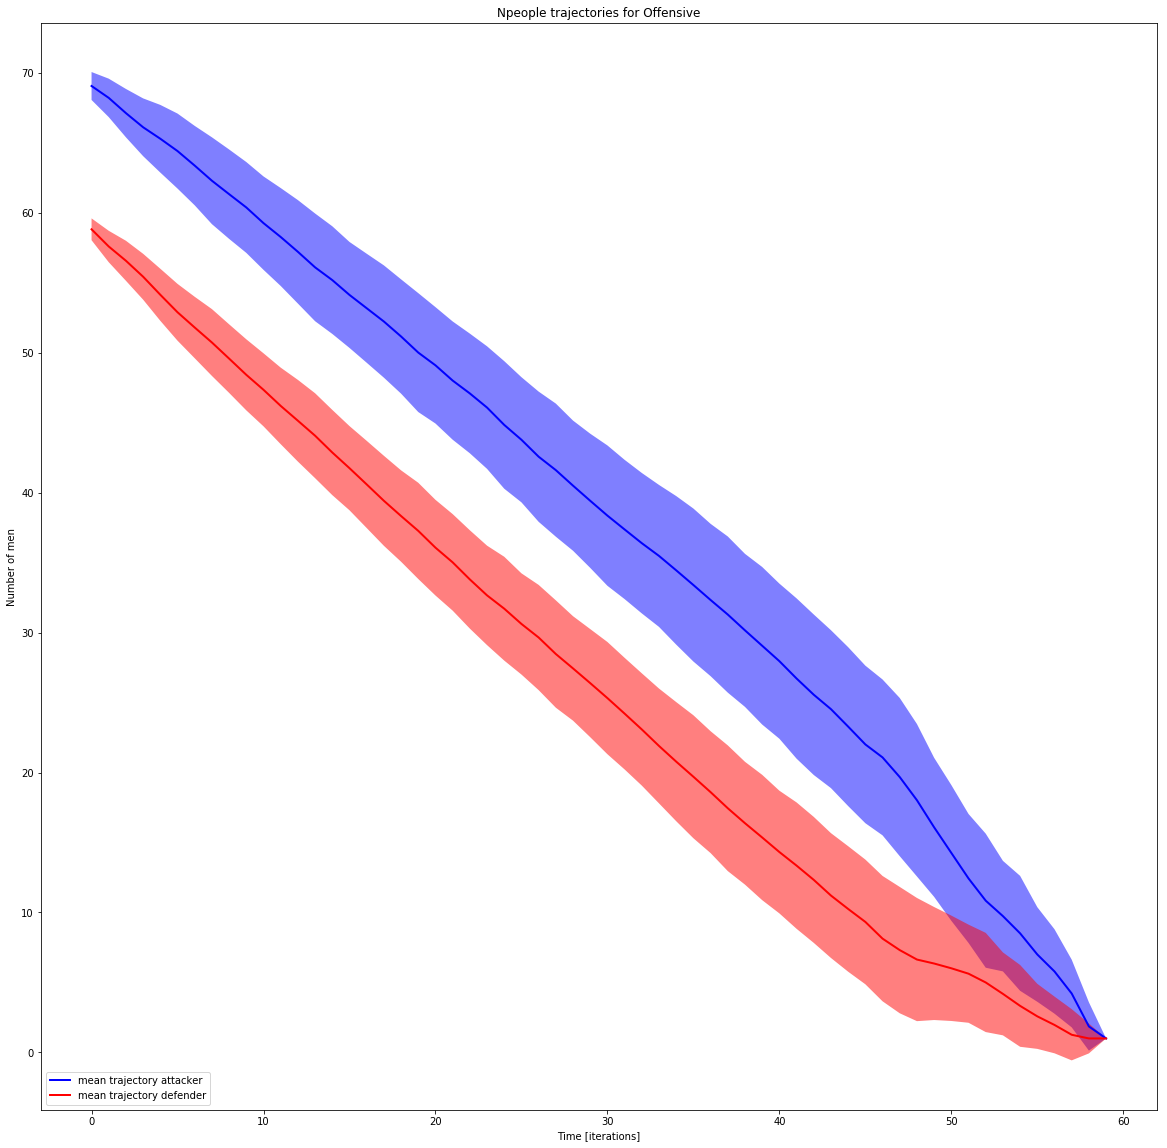

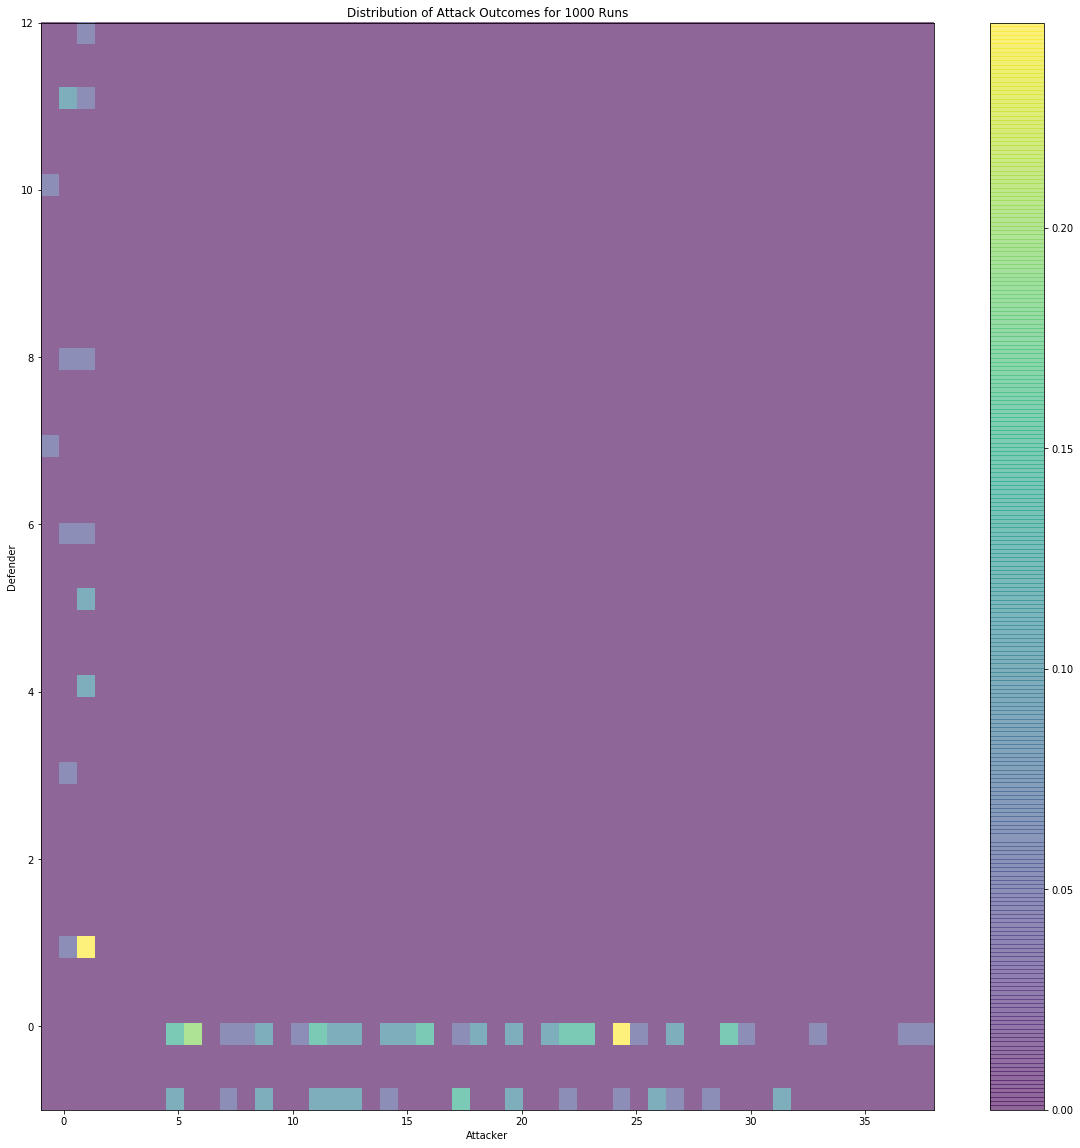

In [39]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pointWin = np.argwhere(muD==0)
fig, ax = plt.subplots(1, figsize=(20,20))
ax.plot(t, muA, lw=2, label='mean trajectory attacker', color='blue')
ax.plot(t, muD, lw=2, label='mean trajectory defender', color='red')
ax.fill_between(t, muA+sigmaA, muA-sigmaA, facecolor='blue', alpha=0.5)
ax.fill_between(t, muD+sigmaD, muD-sigmaD, facecolor='red', alpha=0.5)

ax.set_title("Npeople trajectories for Offensive")
ax.legend(loc='lower left')
ax.set_xlabel("Time [iterations]")
ax.set_ylabel("Number of men")
plt.savefig("./npeople_trajectories.png")
resA = np.array(resA)
resD = np.array(resD)

plt.figure(figsize=(20,20))
plt.hist2d(resA, resD, alpha=.6, normed=True, bins=[50,50])
plt.colorbar()
plt.ylabel("Defender")
plt.title("Distribution of Attack Outcomes for 1000 Runs")
plt.xlabel("Attacker")
plt.savefig("./results.png")

In [40]:
import networkx as nx

In [145]:
WEIGHT_REGULAR = 10
WEIGHT_CONTINENT = 11
class Board(nx.Graph):
    def bridge(self, a, b):
        return self.surround(a,b)
    def surround(self, a, *args):
        bs = args
        for b in bs:
            self.add_edge(a,b)
        return self
    def group(self,  *args, **kwargs):
        weight = kwargs.pop('weight', False)
        for a in args:
            for b in args:
                if a != b:
                    if weight:
                        self.add_edge(a,b, weight=weight)
                    else:
                        self.add_edge(a,b)
        return self
    
    
board = Board()\
.surround("Alaska",
          "Kamatchka",
          "Northwestern Territory",
          "Alberta")\
.surround("Northwestern Territory",
          "Alberta", 
          "Ontario",
          "Greenland", 
          "Alaska")\
.surround("Western United States", 
          "Alberta",
          "Ontario", 
          "Eastern United States", 
          "Central America")\
.surround("Ontario", 
          "Northwestern Territory",
          "Alberta", 
          "Western United States", 
          "Eastern Canada", 
          "Eastern United States", 
          "Greenland")\
.surround("Eastern Canada", 
          "Ontario",
          "Eastern United States", 
          "Greenland")\
.surround("Eastern United States", 
          "Eastern Canada", 
          "Ontario",
          "Western United States", 
          "Central America")\
.bridge("Central America", 
          "Venezuela")\
.group(
    "Venezuela", "Brazil", "Peru")\
.group(
    "Peru",
    "Argentina", 
    "Brazil")\
.bridge("Brazil",
        "North Africa")\
.bridge("Greenland", 
        "Iceland")\
.group(
    "Iceland", "Scandinavia", "Great Britain")\
.bridge("Great Britain", 
        "Northern Europe")\
.surround("Scandinavia", 
          "Russia", 
          "Northern Europe")\
.group(
    "Northern Europe", "Southern Europe", "Western Europe")\
.group(
    "Northern Europe","Southern Europe", "Russia")\
.bridge("Western Europe", 
        "North Africa")\
.group(
    "North Africa", "Egypt", "East Africa")\
.surround("North Africa", 
          "Central Africa", 
          "Brazil")\
.surround("East Africa", 
          "Middle East", 
          "Central Africa")\
.group(
    "Central Africa", "East Africa", "North Africa")\
.group(
    "Central Africa", "East Africa", "South Africa")\
.surround("Madagascar", 
          "East Africa", 
          "South Africa")

board.surround("Middle East", 
               "Russia", 
               "Southern Europe",
               "Egypt", 
               "East Africa", 
               "India", 
               "Afghanistan" )\
.surround("Afghanistan",
         "Russia",
         "Ural",
         "India",
         "China",
         "Middle East")\
.surround("China", 
         "India",
         "Southern Asia",
         "Afghanistan",
         "Mongolia", 
         "Ural",
         "Siberia")\
.surround("Mongolia",
          "China",
         "Irkutsk",
         "Siberia",
         "Japan",
         "Kamatchka")\
.surround("Irkutsk",
         "Mongolia",
         "Kamatchka",
         "Yakutsk",
         "Siberia")\
.surround("Siberia",
         "Ural",
         "Irkutsk",
         "Yakutsk")\
.surround("Ural",
         "Russia",
         "Afghanistan",
         "China",
         "Siberia")\
.surround("India",
         "Middle East",
         "Afghanistan",
         "China",
         "Southern Asia")\
.bridge("Japan", "Mongolia").bridge("Japan", "Kamatchka")\
.surround("Kamatchka", "Yakutsk", "Irkutsk", "Japan", "Alaska")\
.bridge("Southern Asia", "Indonesia")\
.surround("Indonesia", "New Guinea", "Western Australia")\
.surround("Western Australia", "Indonesia", "Eastern Australia", "New Guinea")\
.surround("New Guinea", "Indonesia", "Eastern Australia", "Western Australia")

Map = {
    "North America":[
        "Alaska",
        "Northwestern Territory",
        "Alberta",
        "Ontario",
        "Eastern Canada",
        "Western United States",
        "Eastern United States",
        "Central America",
        "Greenland"],
    "South America":[
        "Venezuela",
        "Brazil",
        "Peru",
        "Argentina"],
    "Europe":[
        "Iceland",
        "Great Britain",
        "Western Europe",
        "Scandinavia",
        "Northern Europe",
        "Southern Europe",
        "Russia"],
    "Africa":[
        "North Africa",
        "Egypt",
        "East Africa",
        "Central Africa",
        "South Africa",
        "Madagascar"],
    "Asia":[
        "Ural",
        "Afghanistan",
        "Middle East",
        "India",
        "Southern Asia",
        "China",
        "Mongolia",
        "Irkutsk",
        "Siberia",
        "Yakutsk",
        "Kamatchka",
        "Japan"],
    "Australia":[
        "Indonesia",
        "New Guinea",
        "Western Australia",
        "Eastern Australia"
        ]
}

for cont, counts in Map.iteritems():
    board.group(*counts, weight=WEIGHT_CONTINENT)

In [146]:
map_inverse = {v2:k for k,v1 in Map.iteritems() for v2 in v1 }
map_inverse

{'Afghanistan': 'Asia',
 'Alaska': 'North America',
 'Alberta': 'North America',
 'Argentina': 'South America',
 'Brazil': 'South America',
 'Central Africa': 'Africa',
 'Central America': 'North America',
 'China': 'Asia',
 'East Africa': 'Africa',
 'Eastern Australia': 'Australia',
 'Eastern Canada': 'North America',
 'Eastern United States': 'North America',
 'Egypt': 'Africa',
 'Great Britain': 'Europe',
 'Greenland': 'North America',
 'Iceland': 'Europe',
 'India': 'Asia',
 'Indonesia': 'Australia',
 'Irkutsk': 'Asia',
 'Japan': 'Asia',
 'Kamatchka': 'Asia',
 'Madagascar': 'Africa',
 'Middle East': 'Asia',
 'Mongolia': 'Asia',
 'New Guinea': 'Australia',
 'North Africa': 'Africa',
 'Northern Europe': 'Europe',
 'Northwestern Territory': 'North America',
 'Ontario': 'North America',
 'Peru': 'South America',
 'Russia': 'Europe',
 'Scandinavia': 'Europe',
 'Siberia': 'Asia',
 'South Africa': 'Africa',
 'Southern Asia': 'Asia',
 'Southern Europe': 'Europe',
 'Ural': 'Asia',
 'Venezue

In [147]:
import matplotlib.cm as cm
import matplotlib as mpl
groups = set(Map.keys())
N = len(groups)
groupint = range(N)
group_to_color = {k: i for i, k in enumerate(Map.keys())}

cmap = cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

bounds = np.linspace(0,N,N+1)

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [148]:
map_inverse["Iceland"]

'Europe'

In [149]:
colors = [group_to_color[map_inverse[node]] for node in board.nodes() ]

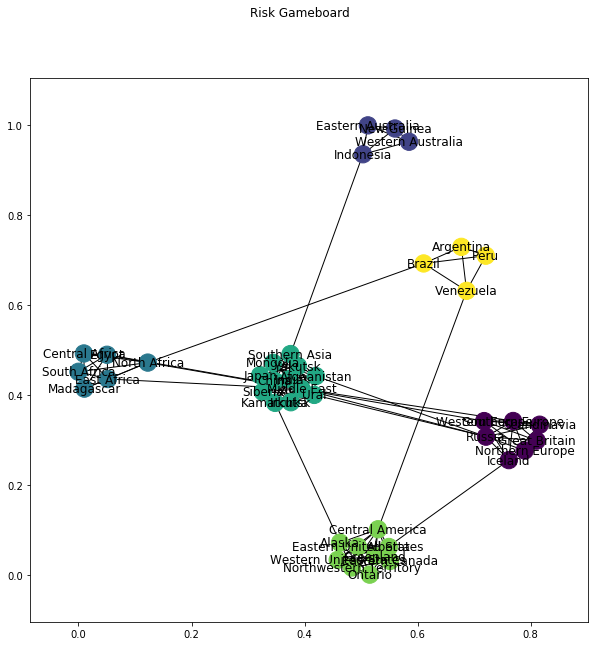

In [161]:
fig, ax = plt.subplots(1, figsize=(10,10))
fig.suptitle("Risk Gameboard")
pos = nx.spring_layout(board)
nx.draw_networkx(board, pos = pos, ax=ax, node_color=colors, node_size=300, font_size=12)

In [165]:
import pickle as pick

In [168]:
with open("./risk_board.pickle", "w") as writeto:
    pick.dump(board, writeto)

## Drift Diffusion Model For Decision Making in Risk

The game of Risk offers a nice opportunity for me to develop my idea of drift diffusion models for discrete decision making and see if they can produce (1) human like irrational predecisional information distortion, and (2) superhuman abilities. 

The difficulty is the sample space is virtually infinite. There are a huge number of possible moves that can be made at any turn. 

(1) Monte Carlo Sampling
(2)  